In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
from IPython.html import widgets

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
class Planeta:
    
    def __init__(self,plantas, albedo_f, luminosidad, prop_fertil, q = 15, boltz = 5.67e-8):
        self.blanca = plantas[0]
        self.negra = plantas[1]
        self.albedo_f = albedo_f
        self.luminosidad = luminosidad
        self.boltz = boltz
        self.albedo_p = None
        self.temp_g = []
        self.temp_g_vacio = []
        self.q = q
        self.prop_fertil = prop_fertil
        self.area_blanca = []
        self.area_negra = []
        self.step = 0
        
    def actualiza_temp_g(self):
        self.temp_g = np.append(self.temp_g,((self.luminosidad[self.step]/(self.boltz))*(1 - self.albedo_p))**0.25 )
        
    def temp_planeta_vacio(self):
        for i in self.luminosidad:
            self.temp_g_vacio = np.append(self.temp_g_vacio,((i/(self.boltz))*(0.5))**0.25 )
    
    def actualiza_albedo_p(self):
        self.prop_fertil = 1 - self.blanca.prop_area - self.negra.prop_area 
        self.albedo_p = self.blanca.prop_area*self.blanca.albedo + self.negra.prop_area*self.negra.albedo + self.prop_fertil*self.albedo_f

    def vivir(self):
        for i in self.luminosidad:
            self.actualiza_albedo_p()
            self.actualiza_temp_g()
            self.blanca.actualizar(self)
            self.negra.actualizar(self)
            self.area_blanca = np.append(self.area_blanca,blanca.prop_area)
            self.area_negra = np.append(self.area_negra,negra.prop_area)
            self.step += 1
        
    def iam(self):
        print "TEMPERATUA GLOBAL: " + str(self.temp_g) + " ALBEDO GLOBAL: " + str(self.albedo_p)
        print "PROPORCION FERTIL: " + str(self.prop_fertil)
        print "STEP " + str(self.step)
        print "AREA NEGRAS:"
        for i in self.area_blanca:
            print i
        print "AREAS BLANCAS:"
        for i in self.area_negra:
            print i
    
    def graficar_areas(self):
        plt.figure(figsize=(8, 6), dpi=80)
        plt.plot(self.luminosidad,self.area_blanca,linewidth = 1.5,  label = "Blancas")
        plt.plot(self.luminosidad,self.area_negra,linewidth = 1.5, label = "Negras")
        plt.plot(self.luminosidad, self.area_blanca + self.area_negra, linewidth = 1.5, label = "Total de area cubierta")
        plt.legend(loc='best')
        plt.ylabel("Proporcion de area cubierta")
        plt.xlabel("Luminosidad solar")
        
    def graficar_temp_g(self):
        plt.figure(figsize=(8, 6), dpi=80)
        plt.plot(self.luminosidad,self.temp_g, color = "blue",linewidth = 3, label = "DaisyWorld")
        plt.plot(self.luminosidad, self.temp_g_vacio, color = "red", linewidth = 3, label = "Mundo vacio")
        plt.legend(loc='upper left')
        plt.ylabel("Temperatura global (K)")
        plt.xlabel("Luminosidad solar")

In [4]:
class Planta:
    dif_area =0
    temp_l=0
    tasa_cre = 0
    def __init__(self, color, albedo, prop_area, tasa_muerte = 0.1, superior = 313, inferior = 278):
        self.color = color
        self.albedo = albedo
        self.prop_area = prop_area
        self.tasa_muerte = tasa_muerte
        self.superior = superior
        self.inferior = inferior
           
    def actualiza_temp_l(self, mundo):
        self.temp_l = mundo.q * (mundo.albedo_p - self.albedo) + mundo.temp_g[mundo.step]
        
    def actualiza_taza_cre(self):
        if self.temp_l > self.inferior and self.temp_l < self.superior :
            self.tasa_cre = (self.temp_l - self.inferior) * (self.superior - self.temp_l) * 4 / (self.inferior -self.superior)**2
        else:
            self.tasa_cre = 0          
            
    def actualiza_area(self,mundo):
        self.dif_area = self.prop_area*(self.tasa_cre * mundo.prop_fertil - self.tasa_muerte)
        self.prop_area = self.prop_area  + self.dif_area
        if self.prop_area <= 0.01:
            self.prop_area = 0.01
        if self.prop_area >= .99:
            self.prop_area = .99

    def actualizar(self,mundo):
        self.actualiza_temp_l(mundo)
        self.actualiza_taza_cre()
        self.actualiza_area(mundo)
    
    def iam(self):
        print "COLOR: " + self.color + " ALBEDO: " + str(self.albedo)
        print "TASA DE MUERTE: " + str(self.tasa_muerte) + " TASA DE CRECIMIENTO: " + str(self.tasa_cre)
        print "TEMPERATURA LOCAL:" + str(self.temp_l) 
        print "AREA " + str(self.prop_area)

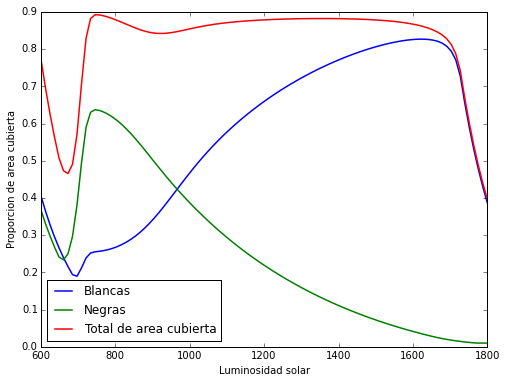

In [8]:
area_n = np.random.rand()
area_b = np.random.rand()
while (area_n + area_b) > 1:
    area_n = np.random.rand()
    area_b = np.random.rand()
area_f = 1 - (area_n + area_b)

negra = Planta("negra",.25, area_n)
blanca = Planta("blanca",.75, area_b)

luminosidad = np.linspace(.6,1.8,100)
luminosidad *= 1000
plantas = [negra,blanca]

primer_intento = Planeta(plantas, 0.5,luminosidad, area_f)
primer_intento.vivir()
primer_intento.graficar_areas()


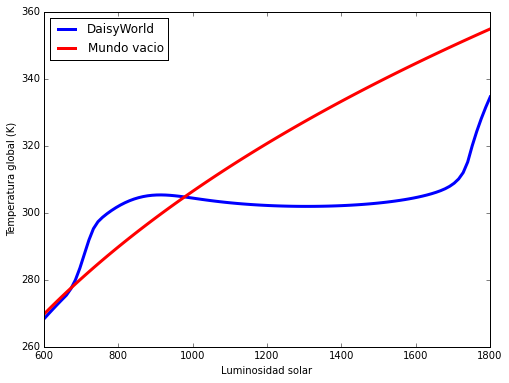

In [11]:
primer_intento.temp_planeta_vacio()
primer_intento.graficar_temp_g()

In [12]:
from IPython.html.widgets import interact, fixed
from IPython.html import widgets

In [15]:
def condiciones_iniciales(aleatorio):
    print aleatorio
    

In [19]:
interact(condiciones_iniciales, leatorio = False)

ValueError: cannot find widget or abbreviation for argument: 'aleatorio'

In [20]:
interact?